# Titanik: život je jen náhoda?


## Cíl

Zjistit, jake společné rysy měli ti, kdo přežili.


## Data

Data byla použita z univerzity Vanderbilt, [odkaz na dokumentaci](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/Ctitanic3.html). 

Data obsahují 1309 pozorování (1 řádek = 1 osoba) a 14 proměnných.

## Seznámení s daty

In [1]:
# Importování knihoven
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Následujicí řádek je potřeba pro zobrazení matplotlib grafů v Jupyter notebooku
%matplotlib inline 

# Následujicí řádek udělá hezčí grafy
plt.style.use('seaborn')

In [2]:
# Načtení dat
data = pd.read_excel('titanic3.xls')
# Podívat se na první 2 řádky
data.head(n=2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# Ukázat počet řádků a sloupců
data.shape

(1309, 14)

In [4]:
# Pro každý sloupec ukázat datový typ
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
# Ukázat, které sloupce mají chybějící hodnoty
data.columns[data.isnull().any()]

Index(['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], dtype='object')

In [6]:
# Pro každý sloupec zobrazit popisnou statistiku
data.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


## Věk

Průměrný věk cestujících v obou skupinach (přeživší a nepřeživší) byl téměř stejný (29 a 30).

In [7]:
# Průměrný věk u přeživších a nepřeživších cestujících
data.groupby('survived').age.mean()

survived
0    30.545369
1    28.918228
Name: age, dtype: float64

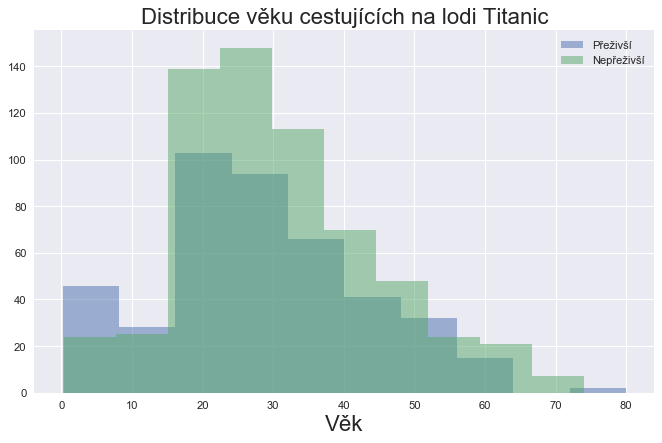

In [8]:
# Vytvořit histogram věku cestujících
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
plt.hist(data[data.survived == 1].age.dropna(), alpha=0.5, label='Přeživší')
plt.hist(data[data.survived == 0].age.dropna(), alpha=0.5, label='Nepřeživší')
plt.title('Distribuce věku cestujících na lodi Titanic', fontdict=dict(fontsize=20))
plt.xlabel('Věk', fontdict=dict(fontsize=20))
plt.legend(loc='upper right')
plt.show()

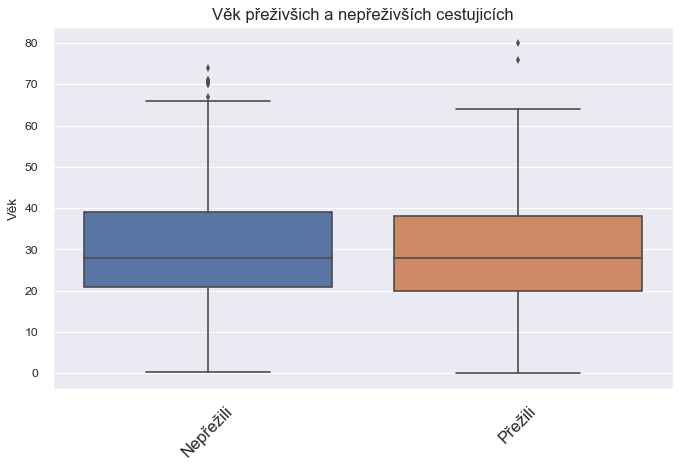

In [9]:
# Vytvořit boxplot věku přeživších a nepřeživších cestujících
sns.set()
plt.figure(figsize=(10,6), dpi= 80)
ax = sns.boxplot(x=data.survived, y=data.age)
plt.title('Věk přeživšich a nepřeživších cestujicích', fontsize=15)
ax.set_xticklabels(['Nepřežili', 'Přežili'], rotation=45, fontsize=15)
plt.xlabel('')
plt.ylabel('Věk')
plt.show()

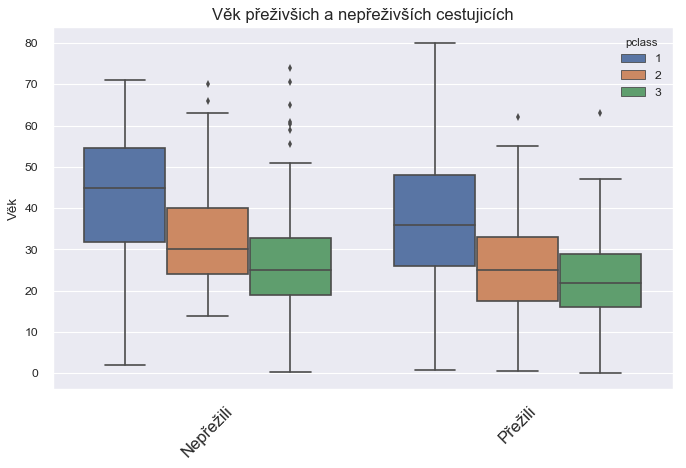

In [10]:
# Vytvořit boxplot věku dle třídy jizdenky přeživších a nepřeživších cestujících
sns.set()
plt.figure(figsize=(10,6), dpi= 80)
ax = sns.boxplot(x=data.survived, y=data.age, hue=data.pclass)
plt.title('Věk přeživšich a nepřeživších cestujicích', fontsize=15)
ax.set_xticklabels(['Nepřežili', 'Přežili'], rotation=45, fontsize=15)
plt.xlabel('')
plt.ylabel('Věk')
plt.show()

## Třída jizdenky

Nejvíce přeživších bylo z 1. třídy (200 versus 181 ze 3. třídy a 119 ze 2. třídy).

In [11]:
# Zjistíme počet přeživších dle třídy
data.groupby(['survived', 'pclass']).count().name

survived  pclass
0         1         123
          2         158
          3         528
1         1         200
          2         119
          3         181
Name: name, dtype: int64

In [12]:
first_not_survived = data[(data.pclass==1) & (data.survived==0)].shape[0]/data[(data.survived==0)].shape[0]
second_not_survived = data[(data.pclass==2) & (data.survived==0)].shape[0]/data[(data.survived==0)].shape[0]
third_not_survived = data[(data.pclass==3) & (data.survived==0)].shape[0]/data[(data.survived==0)].shape[0]

first_survived = data[(data.pclass==1) & (data.survived==1)].shape[0]/data[(data.survived==1)].shape[0]
second_survived = data[(data.pclass==2) & (data.survived==1)].shape[0]/data[(data.survived==1)].shape[0]
third_survived = data[(data.pclass==3) & (data.survived==1)].shape[0]/data[(data.survived==1)].shape[0]

In [13]:
def plot_pass_class(first_not_survived, second_not_survived, third_not_survived, first_survived, second_survived, third_survived):
    plt.figure(figsize=(10,6), dpi=80)
    plt.bar(
    0, first_not_survived,
    bottom=third_not_survived + second_not_survived, color='#c5d1e9', label='1. třída'
    )
    plt.bar(
        1, first_survived, bottom=third_survived + second_survived, color='#c5d1e9'
    )
    plt.bar(
        0, second_not_survived, bottom=third_not_survived, color='#486db5', label='2. třída'
    )
    plt.bar(
        1, second_survived, bottom=third_survived, color='#486db5'
    )
    plt.bar(
        0, third_not_survived, color='#273a61', label='3. třída'
    )
    plt.bar(
        1, third_survived, color='#273a61'
    )
    plt.xticks([0, 1], ['Nepřežili', 'Přežili'], fontsize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Rozdělení přeživšich a nepřeživších cestujicích dle tříd', fontsize=15)
    plt.show()

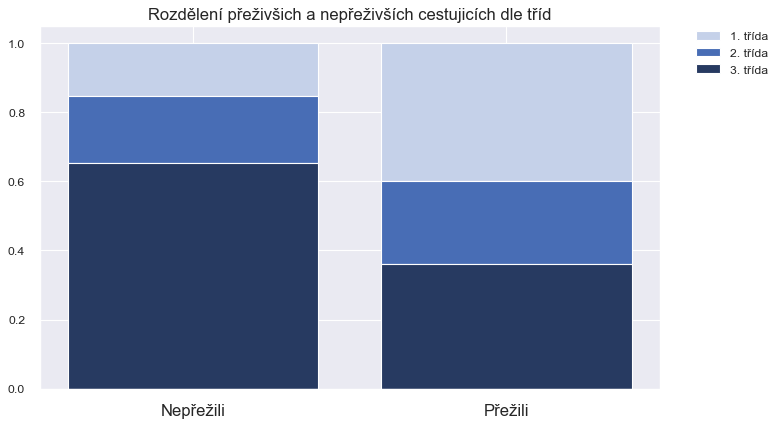

In [14]:
plot_pass_class(
    first_not_survived, second_not_survived, third_not_survived, 
    first_survived, second_survived, third_survived
)

## Pohlaví

Přežilo dvakrát více žen než mužů (339 versus 161).

In [15]:
# Zjistíme počet přeživších dle pohlaví
data.groupby(['survived', 'sex']).count().name

survived  sex   
0         female    127
          male      682
1         female    339
          male      161
Name: name, dtype: int64

In [16]:
def plot_survived_sex(data):
    plt.figure(figsize=(13,10), dpi=80)
    sns.set()
    plt.barh(2.5, data[(data.sex=='male') & (data.survived==0)].shape[0]*(-1), height=5, color='#8da5d2', label='Muži')
    plt.barh(7.5, data[(data.sex=='female') & (data.survived==0)].shape[0]*(-1), height=5, color='#e89fa4', label='Ženy')
    plt.barh(2.5, data[(data.sex=='male') & (data.survived==1)].shape[0], height=5, color='#486db5')
    plt.barh(7.5, data[(data.sex=='female') & (data.survived==1)].shape[0], height=5, color='#d24049')
    plt.axvline(x=0, linewidth=4, color='black')
    plt.xticks([-100, 100], ['Nepřežili', 'Přežili'], fontsize=15)
    plt.legend(loc='upper right')
    plt.xlim(data[(data.sex=='male') & (data.survived==0)].shape[0]*(-1)-10, data[(data.sex=='male') & (data.survived==0)].shape[0]+10)
    plt.ylim(0, 10)
    plt.title('Rozdělení přeživšich a nepřeživších cestujicích dle pohlaví', fontsize=15)
    plt.show()

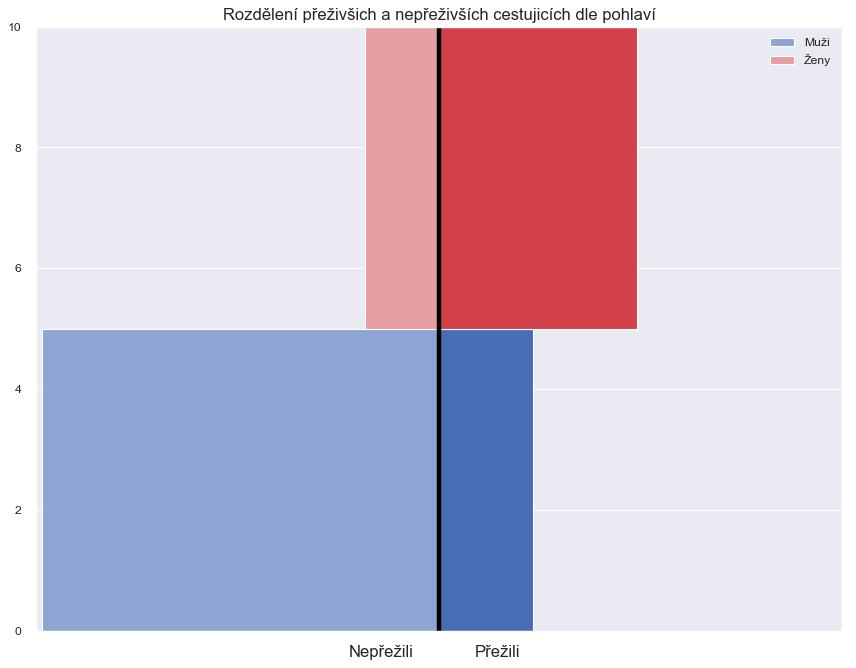

In [17]:
plot_survived_sex(data)

## Paluba

Na všech palubách kromě A a T bylo více než 50% přeživších. Na palubě A to bylo přesně 50% a na palubě T byl jenom jeden cesující - vdovec [Stephen Weart Blackwell](https://www.encyclopedia-titanica.org/titanic-victim/stephen-weart-blackwell.html).

In [18]:
cabin = data.loc[data.cabin.notnull(), ['cabin', 'survived']]
# Vytvoříme číslo paluby tak, že ze sloupce 'cabin' vezmeme první písmeno
cabin['deck'] = cabin.cabin.astype(str).str[0]
# Zjistíme počet přeživších na každé palubě
cabin.groupby(['survived', 'deck']).size().unstack(fill_value=0)

deck,A,B,C,D,E,F,G,T
survived,,,,,,,,
0,11,18,37,14,11,8,2,1
1,11,47,57,32,30,13,3,0


In [19]:
def plot_cabin_survived(cabin):
    cabin_not_survived = cabin.groupby(['survived', 'deck']).size().unstack(fill_value=0).iloc[0].values
    cabin_survived = cabin.groupby(['survived', 'deck']).size().unstack(fill_value=0).iloc[1].values
    plt.figure(figsize=(10,6), dpi=80)
    ax = plt.bar(np.arange(len(cabin_not_survived)), cabin_survived/(cabin_not_survived + cabin_survived), width=0.8)
    plt.title('Podíl přeživších cestujicích dle umístěn palub', fontsize=15)
    plt.xticks(
        np.arange(len(cabin_not_survived)),
        cabin.groupby(['survived', 'deck']).size().unstack(fill_value=0).iloc[0].index
    )
    text_labels = []
    for deck in sorted(cabin.deck.unique()):
        text_labels.append(
            [cabin[(cabin.survived == 1) & (cabin.deck == deck)].shape[0],cabin[(cabin.deck == deck)].shape[0]]
        )
    def autolabel(rects, survived, not_survived):
        for i, rect in enumerate(rects):
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '{0}/{1}'.format(text_labels[i][0], text_labels[i][1]),
                    ha='center', va='bottom')
    autolabel(ax, cabin_survived, cabin_not_survived)
    plt.ylim(0, 1)
    plt.axhline(y=0.5, linewidth=2, color='r')
    plt.show()

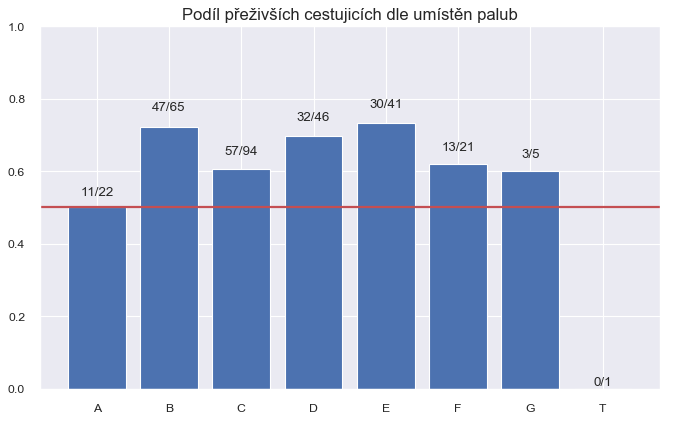

In [20]:
plot_cabin_survived(cabin)

## Záchranná loď

Jakmile byli cestující v jakékoliv lodi, šance na záchranu byly téměř 100%, největší riziko bylo u [záchranné lodě A](https://www.encyclopedia-titanica.org/titanic-lifeboat-a/).

In [21]:
# Seskupíme řádky dle stavu přežití a čísla lodi
boat = data.loc[data.boat.notnull(), ['boat', 'survived']]
boat = boat.groupby(['survived', 'boat']).size().unstack(fill_value=0)

In [22]:
# Přeskupíme sloupce tak, aby na začátku byly sloupce s největším počtem nepřeživších
new_columns = boat.columns[boat.iloc[boat.first_valid_index()].argsort()[::-1]]
boat[new_columns]

boat,A,D,C,B,12,14,16,1,10,11,...,4,5,5 7,5 9,6,7,8,8 10,9,2
survived,,,,,,,,,,,,,,,,,,,,,
0,4,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,19,37,8,18,32,23,5,29,25,...,31,27,2,1,20,23,23,1,25,1
